# GPGN409 homework 
your name: Benjamin Nguyen

In [49]:
using DataFrames, CSV
using LinearAlgebra
using Printf
using CairoMakie
using GLMakie
using StatsBase
using GeometryBasics


In [50]:
CairoMakie.activate!()
df = CSV.read("bhB.csv", DataFrame; delim=',', ignorerepeated=true);
vp = df[:, 1] ./1000
vs = df[:, 2] ./1000
rho = df[:, 3];

In [51]:
# Define the 2D histogram function with keyword arguments
function hist_2d(; x_data::Vector{T}, y_data::Vector{T}, 
                x_num_bins::Int, y_num_bins::Int, 
                first_value_x::Float64, end_value_x::Float64,
                first_value_y::Float64, end_value_y::Float64) where T
        
    # Create new arrays with the added values at the beginning and end
    x_data_extended = [first_value_x; x_data; end_value_x]
    y_data_extended = [first_value_y; y_data; end_value_y]

    # Find the minimum and maximum values for both x and y data
    x_min, x_max = minimum(x_data_extended), maximum(x_data_extended)
    y_min, y_max = minimum(y_data_extended), maximum(y_data_extended)

    # Calculate the bin width for x and y
    x_bin_width = (x_max - x_min) / x_num_bins
    y_bin_width = (y_max - y_min) / y_num_bins

    # Generate the bin edges for both x and y
    x_bin_edges = range(x_min, stop=x_max, length=x_num_bins+1)
    y_bin_edges = range(y_min, stop=y_max, length=y_num_bins+1)

    # Initialize the bins count (2D array)
    bin_counts = zeros(Int, x_num_bins, y_num_bins)

    # Count how many data points fall into each 2D bin
    for (x_val, y_val) in zip(x_data_extended, y_data_extended)
        x_bin_idx = clamp(floor(Int, (x_val - x_min) / x_bin_width) + 1, 1, x_num_bins)
        y_bin_idx = clamp(floor(Int, (y_val - y_min) / y_bin_width) + 1, 1, y_num_bins)
        bin_counts[x_bin_idx, y_bin_idx] += 1
    end
    bin_counts[1,1] = 0
    bin_counts[end, end] = 0

    return x_bin_edges, y_bin_edges, bin_counts./sum(bin_counts)
end


function hist_3d(; x_data::Vector{T}, y_data::Vector{T}, z_data::Vector{T},
                x_num_bins::Int, y_num_bins::Int, z_num_bins::Int, 
                first_value_x::Float64, end_value_x::Float64,
                first_value_y::Float64, end_value_y::Float64,
                first_value_z::Float64, end_value_z::Float64) where T

    # Create new arrays with the added values at the beginning and end
    x_data_extended = [first_value_x; x_data; end_value_x]
    y_data_extended = [first_value_y; y_data; end_value_y]
    z_data_extended = [first_value_z; z_data; end_value_z]

    # Find the minimum and maximum values for x, y, and z data
    x_min, x_max = minimum(x_data_extended), maximum(x_data_extended)
    y_min, y_max = minimum(y_data_extended), maximum(y_data_extended)
    z_min, z_max = minimum(z_data_extended), maximum(z_data_extended)

    # Calculate the bin width for x, y, and z
    x_bin_width = (x_max - x_min) / x_num_bins
    y_bin_width = (y_max - y_min) / y_num_bins
    z_bin_width = (z_max - z_min) / z_num_bins

    # Generate the bin edges for x, y, and z
    x_bin_edges = range(x_min, stop=x_max, length=x_num_bins+1)
    y_bin_edges = range(y_min, stop=y_max, length=y_num_bins+1)
    z_bin_edges = range(z_min, stop=z_max, length=z_num_bins+1)

    # Initialize the bins count (3D array)
    bin_counts = zeros(Int, x_num_bins, y_num_bins, z_num_bins)

    # Count how many data points fall into each 3D bin
    for (x_val, y_val, z_val) in zip(x_data_extended, y_data_extended, z_data_extended)
        x_bin_idx = clamp(floor(Int, (x_val - x_min) / x_bin_width) + 1, 1, x_num_bins)
        y_bin_idx = clamp(floor(Int, (y_val - y_min) / y_bin_width) + 1, 1, y_num_bins)
        z_bin_idx = clamp(floor(Int, (z_val - z_min) / z_bin_width) + 1, 1, z_num_bins)
        bin_counts[x_bin_idx, y_bin_idx, z_bin_idx] += 1
    end

    # Optionally, normalize bin counts (e.g., divide by the total sum)
    norm_bin_counts = bin_counts ./ sum(bin_counts)

    return x_bin_edges, y_bin_edges, z_bin_edges, norm_bin_counts
end

hist_3d (generic function with 1 method)

In [52]:
# Call the function with keyword arguments
vpvs_x_bin_edges, vpvs_y_bin_edges, vpvs_bin_counts = hist_2d(x_data=vp, y_data=vs, 
                                                              x_num_bins=100, y_num_bins=100,
                                                              first_value_x=1.0, end_value_x=5.0,
                                                              first_value_y=1.0, end_value_y=5.0)

vprho_x_bin_edges, vprho_y_bin_edges, vprho_bin_counts = hist_2d(x_data=vp, y_data=rho, 
                                                              x_num_bins=100, y_num_bins=50,
                                                              first_value_x=1.0, end_value_x=5.0,
                                                              first_value_y=2.0, end_value_y=3.0)

vsrho_x_bin_edges, vsrho_y_bin_edges, vsrho_bin_counts = hist_2d(x_data=vs, y_data=rho, 
                                                              x_num_bins=100, y_num_bins=50,
                                                              first_value_x=1.0, end_value_x=5.0,
                                                              first_value_y=2.0, end_value_y=3.0);

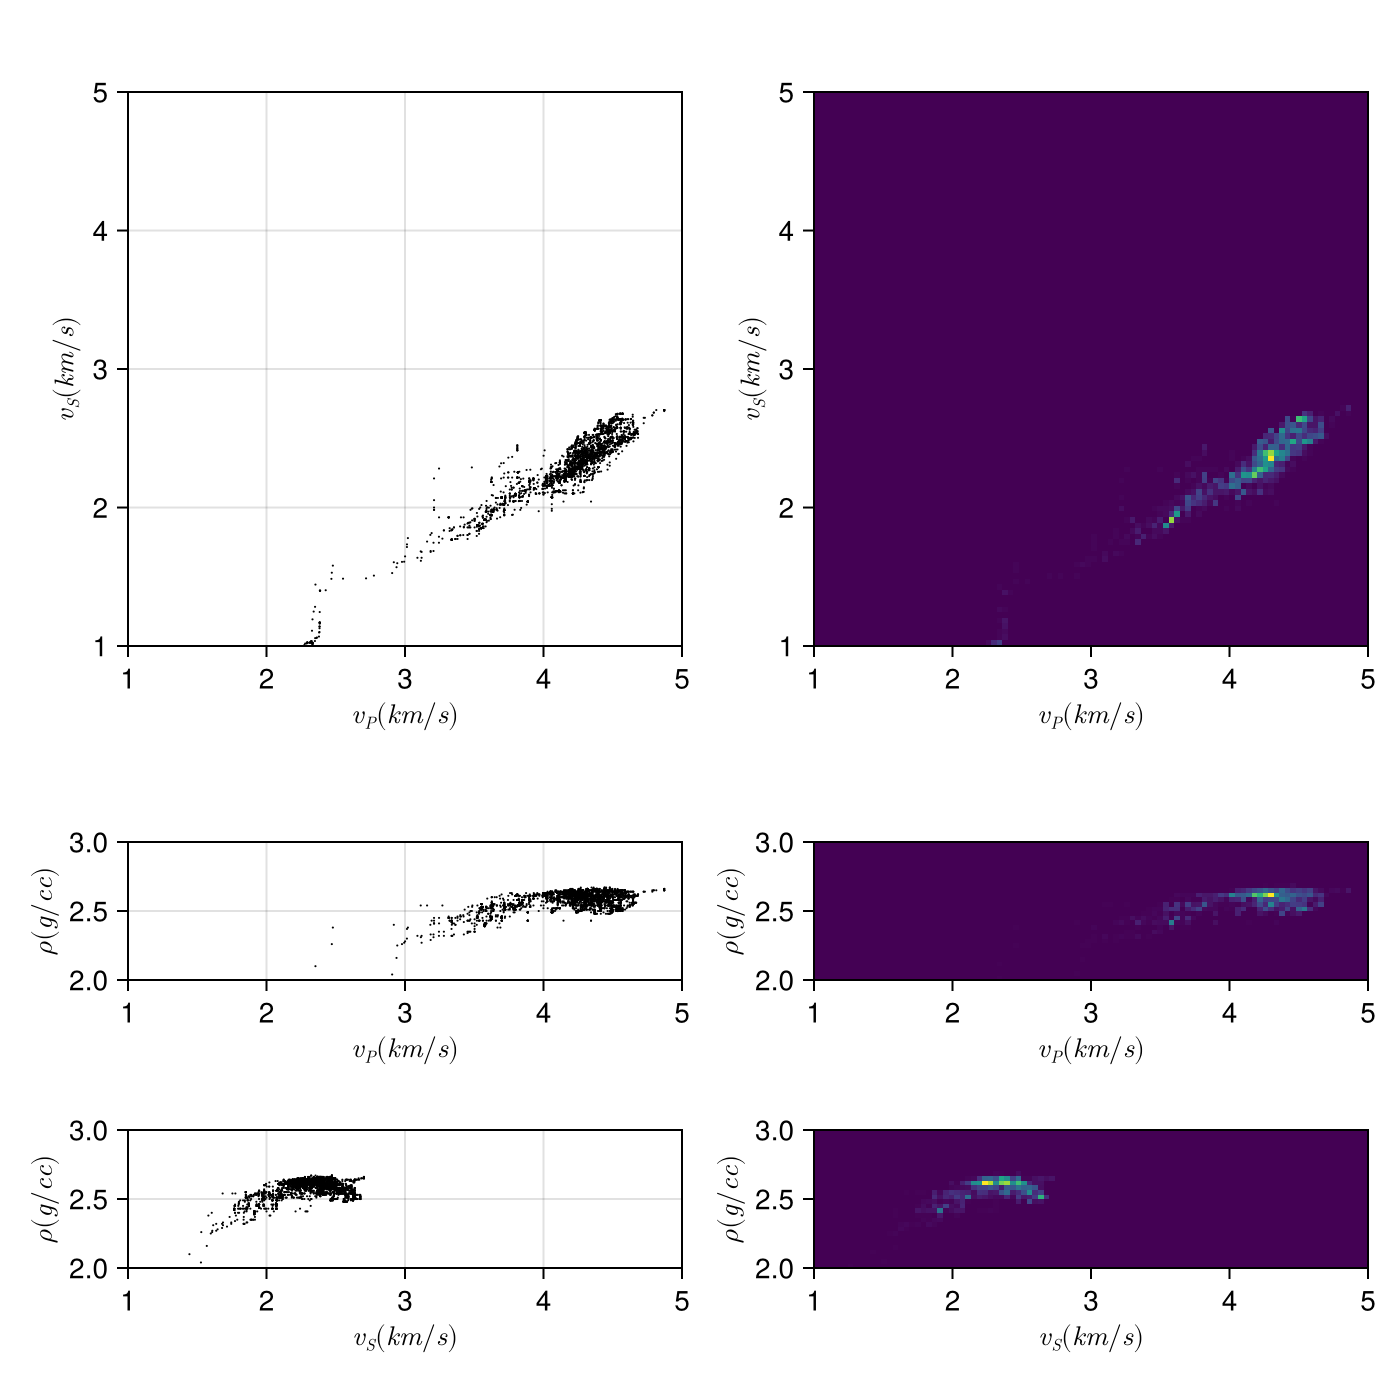

In [53]:
f = Figure(size=(700, 700))

ax1 = Axis(f[1, 1], xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)", aspect = DataAspect(), limits = (1, 5, 1, 5))
ax2 = Axis(f[2, 1], xlabel=L"v_P (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))
ax3 = Axis(f[3, 1], xlabel=L"v_S (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))

ax4 = Axis(f[1, 2], xlabel=L"v_P (km/s)", ylabel=L"v_S (km/s)", aspect = DataAspect(), limits = (1, 5, 1, 5))
ax5 = Axis(f[2, 2], xlabel=L"v_P (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))
ax6 = Axis(f[3, 2], xlabel=L"v_S (km/s)", ylabel=L"\rho (g/cc)", aspect = DataAspect(), limits = (1, 5, 2, 3))

scatter!(ax1, vp, vs, markersize=1.5, color=:black)
scatter!(ax2, vp, rho, markersize=1.5, color=:black)
scatter!(ax3, vs, rho, markersize=1.5, color=:black)
heatmap!(ax4, vpvs_x_bin_edges, vpvs_y_bin_edges, vpvs_bin_counts)
heatmap!(ax5, vprho_x_bin_edges, vprho_y_bin_edges, vprho_bin_counts)
heatmap!(ax6, vsrho_x_bin_edges, vsrho_y_bin_edges, vsrho_bin_counts)

rowsize!(f.layout, 1, Relative(2/3)); f

In [54]:
x_edges, y_edges, z_edges, counts = hist_3d(x_data=vp, y_data=vs, z_data=rho,
                                            x_num_bins=100, y_num_bins=100, z_num_bins=50,
                                            first_value_x=1.0, end_value_x=5.0,
                                            first_value_y=1.0, end_value_y=5.0,
                                            first_value_z=2.0, end_value_z=3.0);





In [55]:
GLMakie.activate!()

# Set the data for x, y, z, and the volume data
x = x_edges
y = y_edges
z = z_edges
vol = counts

# Create the figure and axis for the volume plot
fig = Figure(size = (800, 800))
ax = Axis3(fig[1, 1], perspectiveness = 0.5, azimuth = 7.19, elevation = 0.57)

# Plot the volume data
volume!(ax, x, y, z, vol, colormap = :BuPu, colorrange = (minimum(vol), maximum(vol)))

# Add labels for the axes: vp, vs, and rho
ax.xlabel = L"v_p \, (km/s)"
ax.ylabel = L"v_s \, (km/s)"
ax.zlabel = L"\rho \, (g/cm^3)"

# Define the minimum and maximum bounds for the data
x_min, x_max = minimum(x), maximum(x)
y_min, y_max = minimum(y), maximum(y)
z_min, z_max = minimum(z), maximum(z)

# Create a HyperRectangle using Vec for the origin and size
origin = Vec3f0(x_min, y_min, z_min)
size = Vec3f0(x_max - x_min, y_max - y_min, z_max - z_min)
box = GeometryBasics.HyperRectangle(origin, size)

# Draw the wireframe around the data range
wireframe!(ax, box, color=:black)

# Display the figure
fig


┌ Warning: Encountered an `AbstractVector` with value 1.0:0.04:5.0 on side x in `convert_arguments` for the `ImageLike` trait.
│         Using an `AbstractVector` to specify one dimension of an `ImageLike` is deprecated because `ImageLike` sides always need exactly two values, start and stop.
│         Use interval notation `start .. stop` or a two-element tuple `(start, stop)` instead.
└ @ Makie /Users/ben/.julia/packages/Makie/eERNK/src/conversions.jl:416
┌ Warning: Encountered an `AbstractVector` with value 0.96205:0.0403795:5.0 on side y in `convert_arguments` for the `ImageLike` trait.
│         Using an `AbstractVector` to specify one dimension of an `ImageLike` is deprecated because `ImageLike` sides always need exactly two values, start and stop.
│         Use interval notation `start .. stop` or a two-element tuple `(start, stop)` instead.
└ @ Makie /Users/ben/.julia/packages/Makie/eERNK/src/conversions.jl:416
┌ Warning: Encountered an `AbstractVector` with value 1.33:0.0334:3

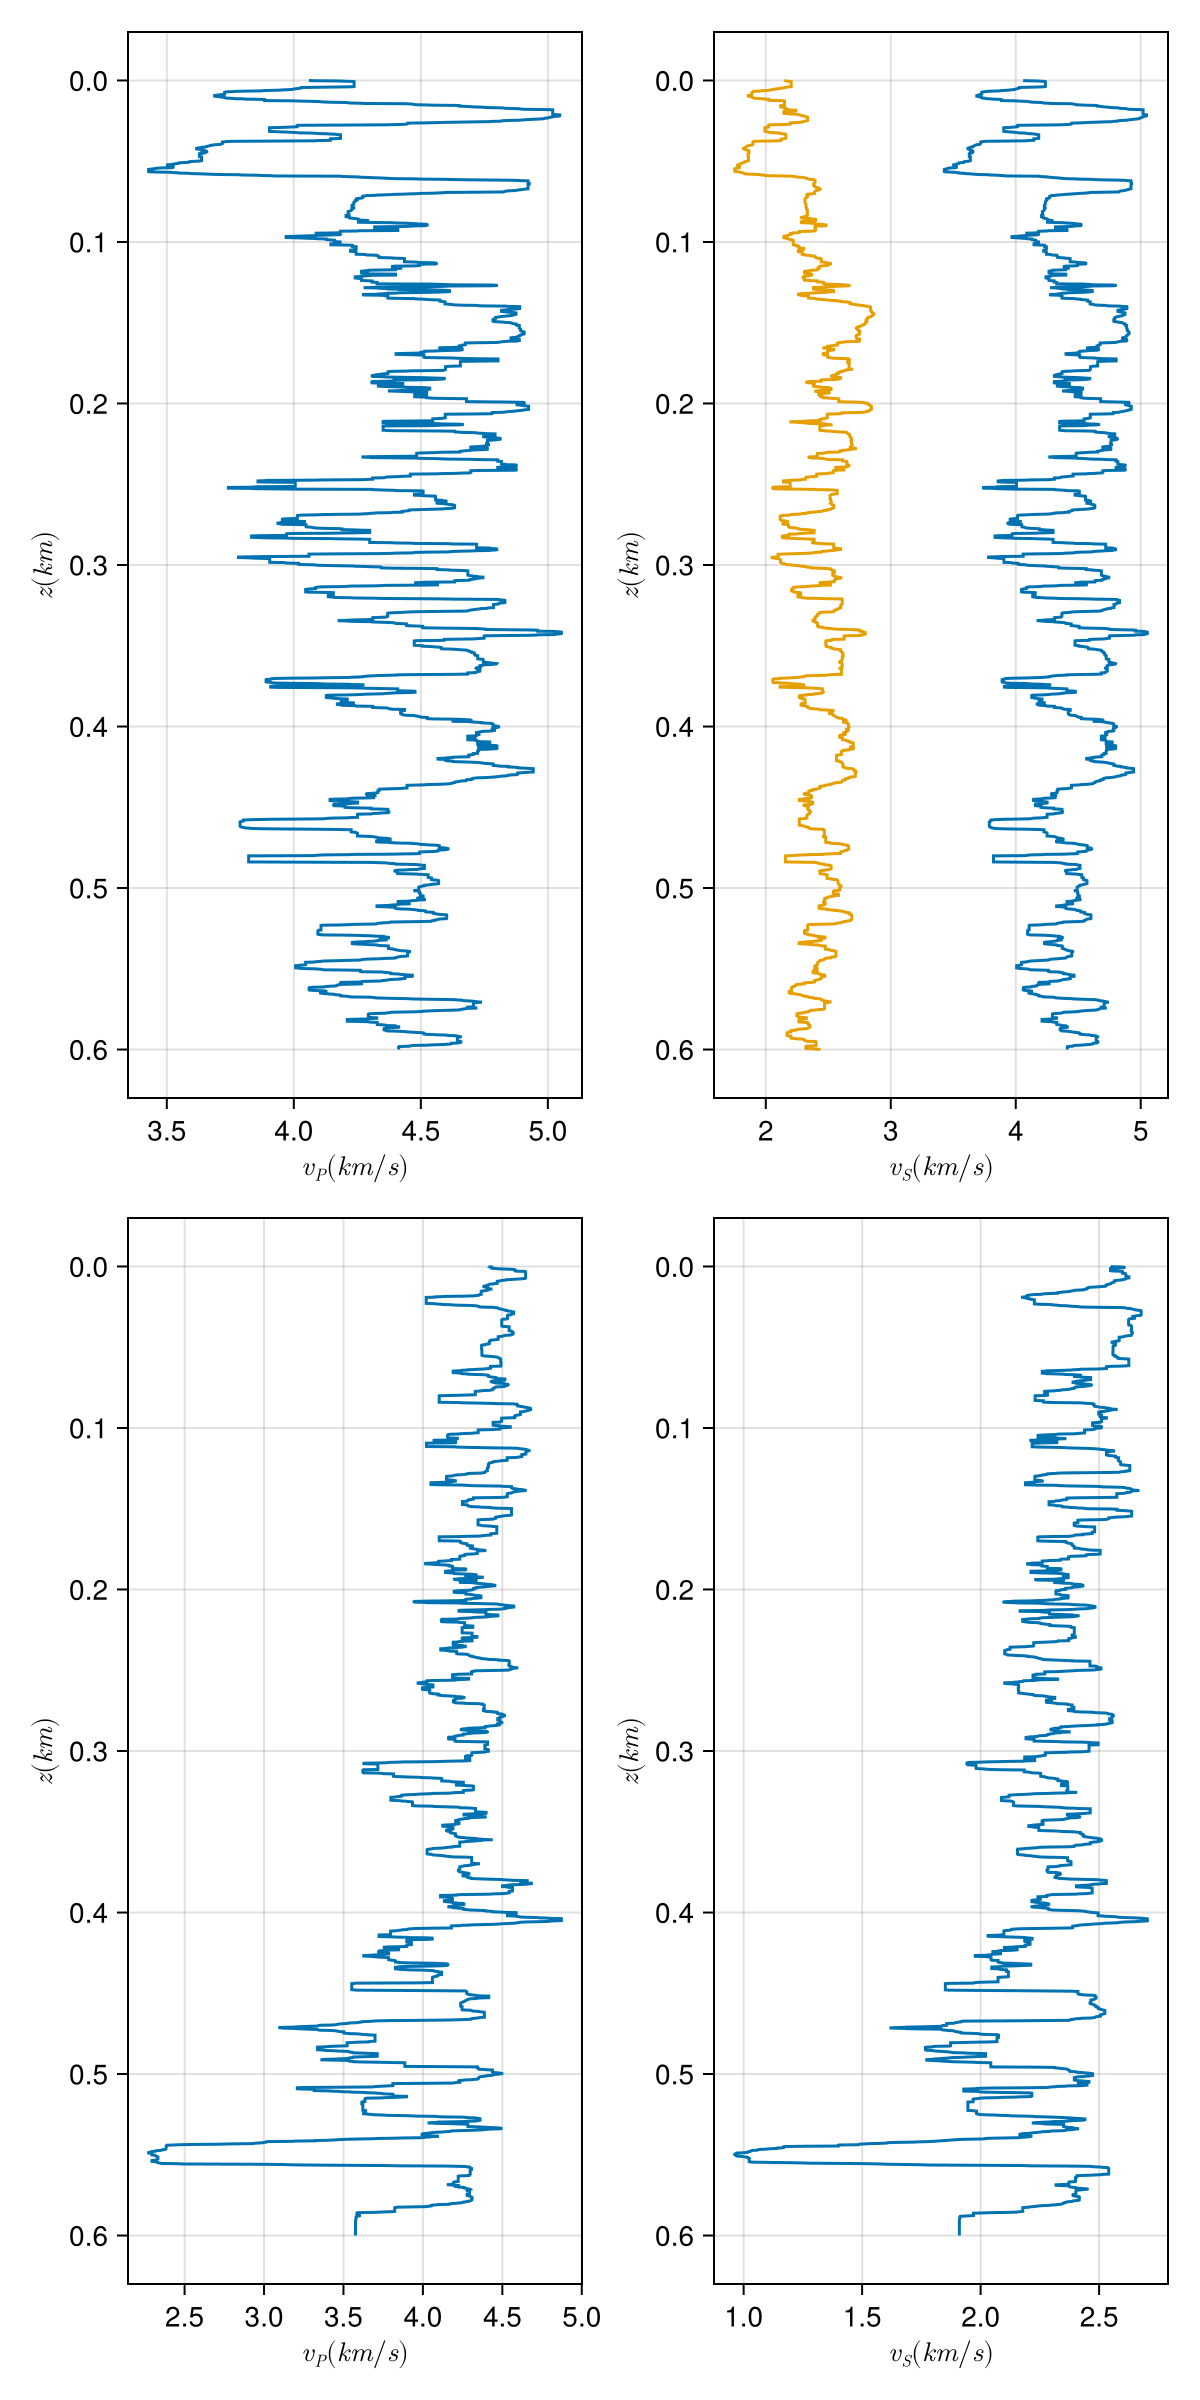

In [56]:
CairoMakie.activate!()
df = CSV.read("bhA.csv", DataFrame; delim=',', ignorerepeated=true);
vpA = df[:, 1] ./1000
vsA = df[:, 2] ./1000
rhoA = df[:, 3];

df = CSV.read("bhB.csv", DataFrame; delim=',', ignorerepeated=true);
vpB = df[:, 1] ./1000
vsB = df[:, 2] ./1000
rhoB = df[:, 3];

# Create the LinRange for z
zA = LinRange(0, 0.6, length(vpA))
zB = LinRange(0, 0.6, length(vpB))

# Create a figure and axis
fig = Figure(size=(600, 1200))
ax1 = Axis(fig[1, 1], xlabel=L"v_P (km/s)", ylabel=L"z (km)")
ax2 = Axis(fig[1, 2], xlabel=L"v_S (km/s)", ylabel=L"z (km)")
ax3 = Axis(fig[2, 1], xlabel=L"v_P (km/s)", ylabel=L"z (km)")
ax4 = Axis(fig[2, 2], xlabel=L"v_S (km/s)", ylabel=L"z (km)")


# Plot the data with lines
lines!(ax1, vpA, zA)
lines!(ax2, vpA, zA)
lines!(ax2, vsA, zA)
lines!(ax3, vpB, zB)
lines!(ax4, vsB, zB)

# Reverse the y-axis
ax1.yreversed = true
ax2.yreversed = true
ax3.yreversed = true
ax4.yreversed = true
ax5.yreversed = true

fig


